Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Ridge and Lasso Regression: Problem solving

In this session, we'll use the `boston` dataset, which has been used to examine the relationship between clean air and house prices:


| Variable | Type | Description |
|:----|:-----|:----------|
|crim | Ratio | per capita crime rate by town | 
|zn | Ratio | proportion of residential land zoned for lots over 25,000 sq. ft. | 
|indus | Ratio | proportion of non-retain business acres per town | 
|chas | Nominal (binary) | Charles River dummy variable (=1 if tract bounds river, =0 otherwise) | 
|nox | Ratio | nitrogen oxides concentration (parts per 10 million) | 
|rm | Ratio | average number of rooms per dwelling | 
|age | Ratio | proportion of owner-occupied units built prior to 1940 | 
|dis | Ratio | weighted mean of distances to five Boston employment centers | 
|rad | Ordinal | index of accessibility to radial highways | 
|tax | Ratio | full-value property tax rate per \$10,000 | 
|ptratio | Ratio | pupil-teacher ratio by town | 
|lstat | Ratio | percent lower status of population (defined as non-high school graduate, manual labor) | 
|medv | Ratio | median value of owner-occupied homes in $1000s | 

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

As before, we'll try to predict `medv` using the rest of the variables.

**Because `medv` is a ratio variable, we will use linear regression not logistic regression.**

## Load data

Start by loading `readr` and `dplyr`.

In [1]:
library(readr)
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load the dataframe.

In [2]:
dataframe = readr::read_csv("datasets/boston.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/cancer.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 506 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, lstat...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,9.67,22.4
0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21,9.08,20.6
0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21,5.64,23.9


## Explore data

Load `base`, `ggplot2`, `psych`, and `corrr` for exploring the data.

In [3]:
library(corrr)
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj" x="-86" y="-4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




### Descriptive statistics

Describe the data.

In [4]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="T0@e2gJUI4JSH/hR}Ww;" x="-132" y="176"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="|?#9B(~d`]d^x)Ge=Szm"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
crim,1,506,3.61352356,8.6015451,0.25651,1.6816300,0.3283218,0.00632,88.9762,88.96988,5.1922223,36.59581589,0.382385321
zn,2,506,11.36363636,23.3224530,0.00000,5.0800493,0.0000000,0.00000,100.0000,100.00000,2.2124881,3.95238731,1.036809500
indus,3,506,11.13677866,6.8603529,9.69000,10.9318719,9.3700320,0.46000,27.7400,27.28000,0.2932747,-1.24019490,0.304979888
chas,4,506,0.06916996,0.2539940,0.00000,0.0000000,0.0000000,0.00000,1.0000,1.00000,3.3857377,9.48197035,0.011291412
nox,5,506,0.55469506,0.1158777,0.53800,0.5450601,0.1297275,0.38500,0.8710,0.48600,0.7249897,-0.08741064,0.005151391
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
rad,9,506,9.549407,8.707259,5.00,8.73399,2.965200,1.00,24.00,23.00,0.9988651,-0.8789291,0.38708489
tax,10,506,408.237154,168.537116,330.00,400.04433,108.229800,187.00,711.00,524.00,0.6659891,-1.1503176,7.49238869
ptratio,11,506,18.455534,2.164946,19.05,18.66256,1.704990,12.60,22.00,9.40,-0.7975743,-0.3048010,0.09624357


-----------
**QUESTION:**

Do the min, mean, and max look reasonable to you, given what these variables mean (see the data description above)?

**ANSWER: (click here to edit)**

*Yes they all look reasonable.*

--------------------

Make a correlation heatmap.

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


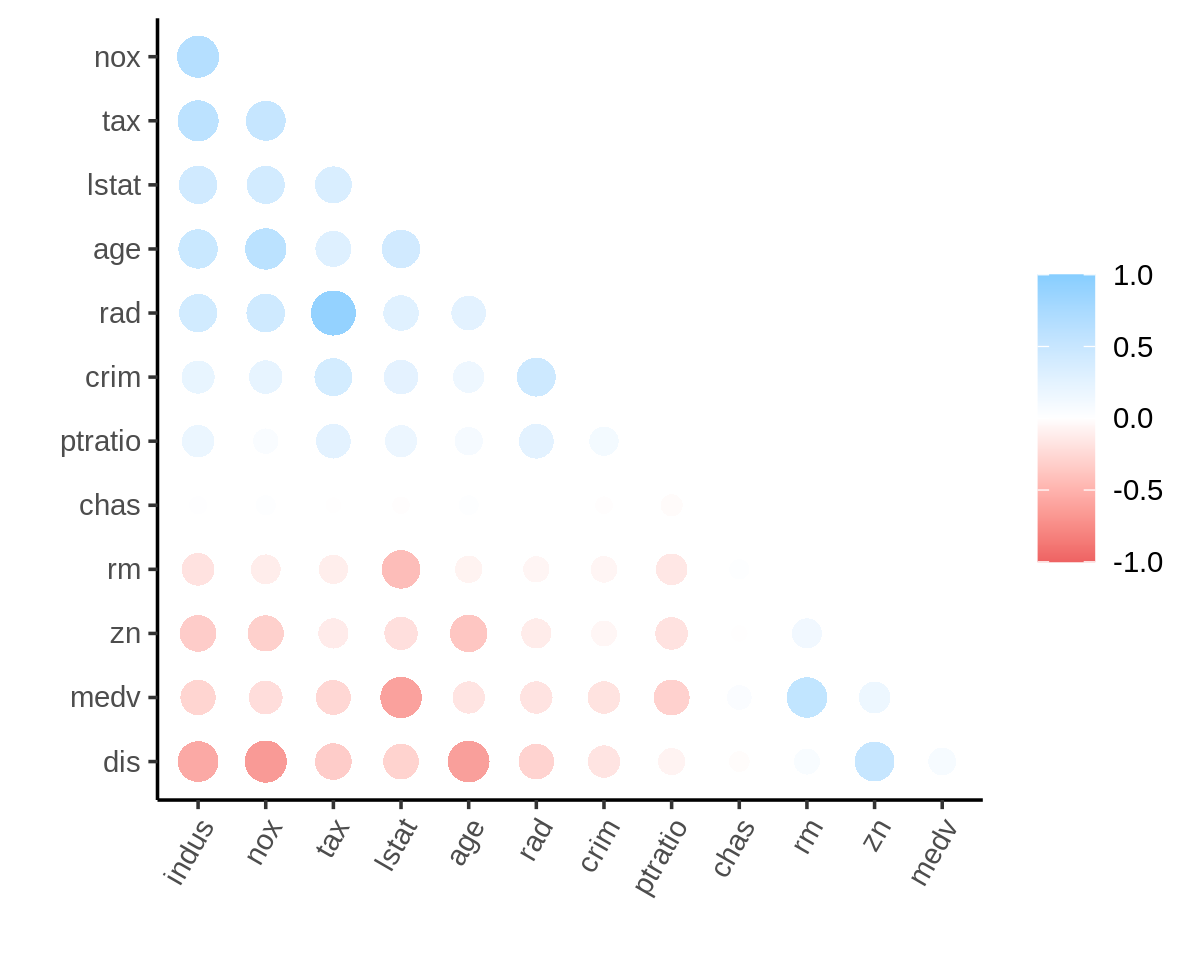

In [5]:
dataframe %>%
    corrr::correlate() %>%
    corrr::rearrange() %>%
    corrr::shave() %>%
    corrr::rplot() +
    ggplot2::theme(axis.text.x = element_text(angle = 60, hjust = 1))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="pipe_R" id="N12|vt`l[nbbEa%Y~#m8" x="-52" y="-175"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id="gVhqUlh8Cy^F.8HkQSR$"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="!IGLlvXdM16CaY84=Bg6"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">correlate</field><data>corrr:correlate</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="}:lkTT23H2F#0KMm`|,/"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rearrange</field><data>corrr:rearrange</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="O/(t7,oDux_+[+q!kGh6"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">shave</field><data>corrr:shave</data></block></value><value name="ADD3"><block type="ggplot_plus_R" id="3ilR0aqrIo(uJr*!6bpU"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="=#E:Zp_ck$*)mk/i8`^K"><mutation items="1"></mutation><field name="VAR" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><field name="MEMBER">rplot</field><data>corrr:rplot</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="f#R*ao;9?HYu9{XmEY3r"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">theme</field><data>ggplot2:theme</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="@ce!p}8ffHehsPmXP[bV"><field name="CODE">axis.text.x = element_text(angle = 60, hjust = 1)</field></block></value></block></value></block></value></block></xml>

----------------------

**QUESTION:**

Do we have strong positive correlations, strong negative correlations, or both?

**ANSWER: (click here to edit)**

*Both. Multicolinearity seems like it will be a problem.*

-----------------

**QUESTION:**

Given the nature of these variables, do these correlations surprise you? 

**ANSWER: (click here to edit)**

*No, we would expect many of these to be related by economic factors.*

-----------------

## Prepare train/test sets

Do the imports needed to split the dataframe into train/test sets.

In [7]:
library(rsample)
library(tidyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="import_R" id="g^doBJYp/fk!)^uuYnUf" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field><next><block type="import_R" id="?6P$ZRn,T9@[Q~MNpW?d"><field name="libraryName" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field></block></next></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Split the data into train/test sets.

In [8]:
data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.04294,28,15.04,0,0.4640,6.249,77.3,3.6150,4,270,18.2,10.59,20.6
1.23247,0,8.14,0,0.5380,6.142,91.7,3.9769,4,307,21.0,18.72,15.2
0.03578,20,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,3.76,45.4
0.03306,0,5.19,0,0.5150,6.059,37.3,4.8122,5,224,20.2,8.51,20.6
0.08387,0,12.83,0,0.4370,5.874,36.6,4.5026,5,398,18.7,9.10,20.3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.57834,20,3.97,0,0.575,8.297,67.0,2.4216,5,264,13.0,7.44,50.0
0.14103,0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,15.84,20.3
9.72418,0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,19.52,17.1


## Model 1: Linear regression

Do the imports needed to build and evaluate a linear regression model using a workflow (for scaling).

You may wish to refer to the multiple linear regression notebook as well as the lasso notebook for this.

In [9]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="cegz.xTQ~Bq[q~wqZQHD"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


### Training

Make a workflow with scaling, fit it, and augment data all in one cell.
Remember you are predicting `medv` using all other variables, and you are using linear regression.

In [10]:
recipe = recipes::recipe(medv ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors())
model = parsnip::linear_reg() %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("lm")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)
model_linear = generics::fit(workflow,data = data_train)
data_evaluation_linear = generics::augment(model_linear,data_test)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="|VNeB7,NnQ:]Hqqxnn$=">model_linear</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="tXm^@Fh6oY}MV/OZ@HMZ">data_evaluation_linear</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="-92" y="98"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">medv ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="4GS=rm//,9|E^?oX.CVv"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">linear_reg</field><data>parsnip:linear_reg</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">lm</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value><next><block type="variables_set" id="uPz?0#f)qaDo*K{v~.T#"><field name="VAR" id="|VNeB7,NnQ:]Hqqxnn$=">model_linear</field><value name="VALUE"><block type="varDoMethod_R" id="1k%URX)R$N[Sz+Af]Bp-"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="EOhqDQRWe?r|ILuJX4/t"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="[_z9jOR|uGR]AC:laZe;"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="_5S[h.UFv,L8;N3+2uhP"><field name="VAR" id="tXm^@Fh6oY}MV/OZ@HMZ">data_evaluation_linear</field><value name="VALUE"><block type="varDoMethod_R" id="G^kD}UQ+AQ+2.6Z*BbT#"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="t(UW+qq9JfeWzk.ROh!O"><field name="VAR" id="|VNeB7,NnQ:]Hqqxnn$=">model_linear</field></block></value><value name="ADD1"><block type="variables_get" id="t?9CE.G3ce=.Vv7A|Ig/"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block></next></block></next></block></next></block></next></block></xml>

### Evaluation

Get the $r^2$ on the test split.

*Hint: `metrics` and `.pred`*

In [11]:
yardstick::metrics(data_evaluation_linear,truth=medv,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="tXm^@Fh6oY}MV/OZ@HMZ">data_evaluation_linear</variable></variables><block type="varDoMethod_R" id="3=uPQBiVy7N)`7+V2G3A" x="84" y="-223"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="%2#(Hz]Y1fc+k+N4`fuT"><field name="VAR" id="tXm^@Fh6oY}MV/OZ@HMZ">data_evaluation_linear</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|?##0km!A[E=#RczhyQ5"><field name="CODE">truth=medv</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="bM:qFf8W1`^^}?Cpw8x3"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6.1220173
rsq,standard,0.6536976
mae,standard,3.8781170


------------------------
**QUESTION:**

Is this a good $r^2$?

**ANSWER: (click here to edit)**

*It's pretty good, especially since it is on test data.*

------------------------

Print the coefficients of the model, sorted by `estimate`.

In [14]:
model_linear %>%
    generics::tidy() %>%
    dplyr::arrange(estimate)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="|VNeB7,NnQ:]Hqqxnn$=">model_linear</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="pipe_R" id="H7i~sa]ah7T)N].84nS2" x="8" y="-102"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="8~/HV)xCsSb.yev`WNK!"><field name="VAR" id="|VNeB7,NnQ:]Hqqxnn$=">model_linear</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="+3g*L{1nxRT|C~UI/o*f"><mutation items="1"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">tidy</field><data>generics:tidy</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="UU9k!xmXR7N#k}(s@@~("><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">arrange</field><data>dplyr:arrange</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="gLvCTMI+F#3x?`}Olr!:"><field name="CODE">estimate</field></block></value></block></value></block></xml>

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
lstat,-3.301121,0.3817130,-8.648174,1.368869e-16
dis,-3.068551,0.4483578,-6.843979,2.988956e-11
nox,-2.387498,0.4572891,-5.220983,2.897307e-07
ptratio,-2.160795,0.2961015,-7.297481,1.649013e-12
tax,-2.081140,0.6457682,-3.222735,1.376213e-03
⋮,⋮,⋮,⋮,⋮
chas,0.4703702,0.2303879,2.041644,4.185755e-02
zn,1.0670400,0.3407319,3.131612,1.869277e-03
rad,2.1316173,0.6001319,3.551915,4.291016e-04


------------------------
**QUESTION:**

What are the two variables that most positively impact house price?
What are the two variables that most negatively impact house price?

**ANSWER: (click here to edit)**

*Positive: `rm` (rooms per dwelling) and `rad` (distance to highway)
Negative: `lstat` (lower status) and `nox` (air quality). Answers may vary based on the data split.*

------------------------

<!-- TODO: might be worth doing diagnostics for each model, though I'm concerned about how long that would take -->

## Model 2: Lasso regression (penalty=.25)

### Training

Next train a lasso regression model with a penalty of .25.
Make a workflow with scaling, fit it, and augment data all in one cell.
Remember you are predicting `medv` using all other variables, and you are using **linear** regression.

In [16]:
recipe = recipes::recipe(medv ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors())
model = parsnip::linear_reg(penalty = .25,mixture = 1) %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("glmnet")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)
model_linear_lasso_25 = generics::fit(workflow,data = data_train)
data_evaluation_linear_lasso_25 = generics::augment(model_linear_lasso_25,data_test)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="1X%sQ25]n$t/7kc!5?lD">model_linear_lasso_25</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="q4T:Y~?0uCwWn_23vj}#">data_evaluation_linear_lasso_25</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="-92" y="98"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">medv ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="4GS=rm//,9|E^?oX.CVv"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="2"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">linear_reg</field><data>parsnip:linear_reg</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="(5EIUtG1r[s`nFr6*q_o"><field name="CODE">penalty = .25</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="Rz=`aMMZP1!)]onSuI[%"><field name="CODE">mixture = 1</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">glmnet</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value><next><block type="variables_set" id="uPz?0#f)qaDo*K{v~.T#"><field name="VAR" id="1X%sQ25]n$t/7kc!5?lD">model_linear_lasso_25</field><value name="VALUE"><block type="varDoMethod_R" id="1k%URX)R$N[Sz+Af]Bp-"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="EOhqDQRWe?r|ILuJX4/t"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="[_z9jOR|uGR]AC:laZe;"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="_5S[h.UFv,L8;N3+2uhP"><field name="VAR" id="q4T:Y~?0uCwWn_23vj}#">data_evaluation_linear_lasso_25</field><value name="VALUE"><block type="varDoMethod_R" id="G^kD}UQ+AQ+2.6Z*BbT#"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="t(UW+qq9JfeWzk.ROh!O"><field name="VAR" id="1X%sQ25]n$t/7kc!5?lD">model_linear_lasso_25</field></block></value><value name="ADD1"><block type="variables_get" id="t?9CE.G3ce=.Vv7A|Ig/"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block></next></block></next></block></next></block></next></block></xml>

### Evaluation

Get the $r^2$ on the test split.

In [17]:
yardstick::metrics(data_evaluation_linear_lasso_25,truth=medv,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="q4T:Y~?0uCwWn_23vj}#">data_evaluation_linear_lasso_25</variable></variables><block type="varDoMethod_R" id="3=uPQBiVy7N)`7+V2G3A" x="84" y="-223"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="%2#(Hz]Y1fc+k+N4`fuT"><field name="VAR" id="q4T:Y~?0uCwWn_23vj}#">data_evaluation_linear_lasso_25</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|?##0km!A[E=#RczhyQ5"><field name="CODE">truth=medv</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="bM:qFf8W1`^^}?Cpw8x3"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6.3930869
rsq,standard,0.6203586
mae,standard,3.9387304


------------------------
**QUESTION:**

How does this compare to the previous $r^2$? 
Should we be concerned?

**ANSWER: (click here to edit)**

*We lost 3-4% of the variance, but since we know our variables are highly correlated, we might be OK with that. We should look at the model to decide.*

------------------------

Print the nonzero coefficients, sorted by `estimate`.

In [19]:
model_linear_lasso_25 %>%
    hardhat::extract_fit_parsnip() %>%
    generics::tidy() %>%
    dplyr::filter(estimate!=0) %>%
    dplyr::arrange(estimate)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="1X%sQ25]n$t/7kc!5?lD">model_linear_lasso_25</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="pipe_R" id="wOW%V1zWHj{dKgZX0nE}" x="195" y="-59"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id="0W2*rlQ3H8[6N_,2{+3E"><field name="VAR" id="1X%sQ25]n$t/7kc!5?lD">model_linear_lasso_25</field></block></value><value name="ADD0"><block type="varDoMethod_R" id=",!`Ide3T7c9BtktumWu{"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_parsnip</field><data>hardhat:extract_fit_parsnip</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="XBsws]^r.aQRran0~N3V"><mutation items="1"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">tidy</field><data>generics:tidy</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="ONRJZje2;TcI:(@,q/+]"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">filter</field><data>dplyr:filter</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="i!*hO?TiXoN*II:*+.mm"><field name="CODE">estimate!=0</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="T3CQI^jrhE^uloQD(;wt"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">arrange</field><data>dplyr:arrange</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="@Q*o!S$KiCc8xCcy|yC("><field name="CODE">estimate</field></block></value></block></value></block></xml>

term,estimate,penalty
<chr>,<dbl>,<dbl>
lstat,-3.1385282,0.25
ptratio,-1.9532601,0.25
dis,-1.3476498,0.25
nox,-1.2386702,0.25
crim,-0.4079866,0.25
tax,-0.3509116,0.25
zn,0.1935485,0.25
chas,0.2999464,0.25
rm,3.1101730,0.25


------------------------
**QUESTION:**

What are the two variables that most positively impact house price?
What are the two variables that most negatively impact house price?
How is this different from before?

**ANSWER: (click here to edit)**

*Positive: `rm` (rooms per dwelling) and `chas` (next to river)
Negative: `lstat` (lower status) and `ptratio` (teacher ratio).*
Both `rad` and `nox` changed. `rad` went to zero and `nox` went towards zero.

------------------------

## Model 3: Lasso regression (penalty=.75)

### Training

Make another lasso regression workflow using penalty=.75, implementing all the steps as before to create augmented test data.

In [20]:
recipe = recipes::recipe(medv ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors())
model = parsnip::linear_reg(penalty = .75,mixture = 1) %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("glmnet")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)
model_linear_lasso_75 = generics::fit(workflow,data = data_train)
data_evaluation_linear_lasso_75 = generics::augment(model_linear_lasso_75,data_test)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="85}qi.u.^dqfDy*P,*is">model_linear_lasso_75</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="|ni)9enfq4xLET^Q_fVb">data_evaluation_linear_lasso_75</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="-92" y="98"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">medv ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="4GS=rm//,9|E^?oX.CVv"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="2"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">linear_reg</field><data>parsnip:linear_reg</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="(5EIUtG1r[s`nFr6*q_o"><field name="CODE">penalty = .75</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="Rz=`aMMZP1!)]onSuI[%"><field name="CODE">mixture = 1</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">glmnet</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value><next><block type="variables_set" id="uPz?0#f)qaDo*K{v~.T#"><field name="VAR" id="85}qi.u.^dqfDy*P,*is">model_linear_lasso_75</field><value name="VALUE"><block type="varDoMethod_R" id="1k%URX)R$N[Sz+Af]Bp-"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="EOhqDQRWe?r|ILuJX4/t"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="[_z9jOR|uGR]AC:laZe;"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="_5S[h.UFv,L8;N3+2uhP"><field name="VAR" id="|ni)9enfq4xLET^Q_fVb">data_evaluation_linear_lasso_75</field><value name="VALUE"><block type="varDoMethod_R" id="G^kD}UQ+AQ+2.6Z*BbT#"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="t(UW+qq9JfeWzk.ROh!O"><field name="VAR" id="85}qi.u.^dqfDy*P,*is">model_linear_lasso_75</field></block></value><value name="ADD1"><block type="variables_get" id="t?9CE.G3ce=.Vv7A|Ig/"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block></next></block></next></block></next></block></next></block></xml>

### Evaluation

Get the $r^2$ on the test splits.

In [21]:
yardstick::metrics(data_evaluation_linear_lasso_75,truth=medv,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="|ni)9enfq4xLET^Q_fVb">data_evaluation_linear_lasso_75</variable></variables><block type="varDoMethod_R" id="3=uPQBiVy7N)`7+V2G3A" x="84" y="-223"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="%2#(Hz]Y1fc+k+N4`fuT"><field name="VAR" id="|ni)9enfq4xLET^Q_fVb">data_evaluation_linear_lasso_75</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="|?##0km!A[E=#RczhyQ5"><field name="CODE">truth=medv</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="bM:qFf8W1`^^}?Cpw8x3"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6.6711805
rsq,standard,0.5882804
mae,standard,4.1556031


------------------------
**QUESTION:**

How does this compare to the previous $r^2$? 
Should we be concerned?

**ANSWER: (click here to edit)**

*We lost another 3-4% of the variance, which is more concerning. We should look at the model to decide.*

------------------------

Print the nonzero coefficients, sorted by `estimate`.

In [23]:
model_linear_lasso_75 %>%
    hardhat::extract_fit_parsnip() %>%
    generics::tidy() %>%
    dplyr::filter(estimate!=0) %>%
    dplyr::arrange(estimate)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="85}qi.u.^dqfDy*P,*is">model_linear_lasso_75</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="pipe_R" id="wOW%V1zWHj{dKgZX0nE}" x="195" y="-59"><mutation items="4"></mutation><value name="INPUT"><block type="variables_get" id="0W2*rlQ3H8[6N_,2{+3E"><field name="VAR" id="85}qi.u.^dqfDy*P,*is">model_linear_lasso_75</field></block></value><value name="ADD0"><block type="varDoMethod_R" id=",!`Ide3T7c9BtktumWu{"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_parsnip</field><data>hardhat:extract_fit_parsnip</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="XBsws]^r.aQRran0~N3V"><mutation items="1"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">tidy</field><data>generics:tidy</data></block></value><value name="ADD2"><block type="varDoMethod_R" id="ONRJZje2;TcI:(@,q/+]"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">filter</field><data>dplyr:filter</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="i!*hO?TiXoN*II:*+.mm"><field name="CODE">estimate!=0</field></block></value></block></value><value name="ADD3"><block type="varDoMethod_R" id="T3CQI^jrhE^uloQD(;wt"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">arrange</field><data>dplyr:arrange</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="@Q*o!S$KiCc8xCcy|yC("><field name="CODE">estimate</field></block></value></block></value></block></xml>

term,estimate,penalty
<chr>,<dbl>,<dbl>
lstat,-3.04738719,0.75
ptratio,-1.62022936,0.75
tax,-0.48658794,0.75
crim,-0.06353968,0.75
rm,3.00520397,0.75
(Intercept),22.18440594,0.75


------------------------
**QUESTION:**

What are the two variables that most positively impact house price?
What are the two variables that most negatively impact house price?
How is this different from before?

**ANSWER: (click here to edit)**

*Positive: `rm` (rooms per dwelling), so `chas` has gone to zero.
Negative: `lstat` (lower status) and `ptratio` (teacher ratio), so same as before*


------------------------

### Comparing Lasso models

------------------------
**QUESTION:**

Which model do you prefer?
Why?

**ANSWER: (click here to edit)**

*Probably 3 because it has narrowed down the variables so well.*



------------------------
**QUESTION:**

Is there any model that you don't trust?
Why?

**ANSWER: (click here to edit)**

*I don't trust model 1 b/c of the multicolinearity. The fact that models 2 and 3 are stable suggests they may have corrected the problem, so I trust them more.*

------------------------

**QUESTION:**

If you were to more seriously investigate multicolinearity in this situation, what are other things you could do?

**ANSWER: (click here to edit)**

*More careful plots to understand the relationships between variables. Perhaps some variables can be excluded from the model manually. Also using ridge regression to compare against logistic regression might be a good idea to make sure they give similar results, since we know multicolinearity can make estimates unreliable.*

------------------------

**QUESTION:**

What is the interpretation of the four most positive/negative coefficients in model 3 and their impact on house price?

**ANSWER: (click here to edit)**

*Because the data has been standardized, the coefficients represent standard deviations.
So for each SD change in the variable, we expect a change in house prices equal the coefficient in SDs.
For example, we expect a 1 SD increase in `lstat` to decrease house prices by 3.48 SDs.
Since we know a house price SD is about \\$9,000 (from the descriptive statistics), that means a decline of about \\$31,500 in house prices for each 1 SD increase in `lstat`.*

------------------------

<!--  -->